Привет, Дарья!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего первого проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый комментарий ревьюера ver.2
    
#### Успех
    
Благодарю тебя за то, что ты исправила все замечания. Вот теперь проект я принимаю и желаю тебе успехов в дальнейшей учебе. Ты точно справишься. Я уверен;)
</div 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Благодарю тебя за небольшое оглавление к проекту. 
</div 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [3]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,"3,550,000.00",35.30,2018-02-28T00:00:00,1,2.86,15.00,16.30,4,NaN,False,False,9.10,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00
23690,3,"5,500,000.00",52.00,2018-07-19T00:00:00,2,NaN,5.00,31.00,2,NaN,False,False,6.00,NaN,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,NaN,15.00
23691,11,"9,470,000.00",72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,False,10.60,1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,NaN,1.00,806.00,519.00
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,NaN,5.00,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23693,9,"4,600,000.00",62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,False,8.00,0.00,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Информацию о нашем датафрейме получили. Отлично. 
</div 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

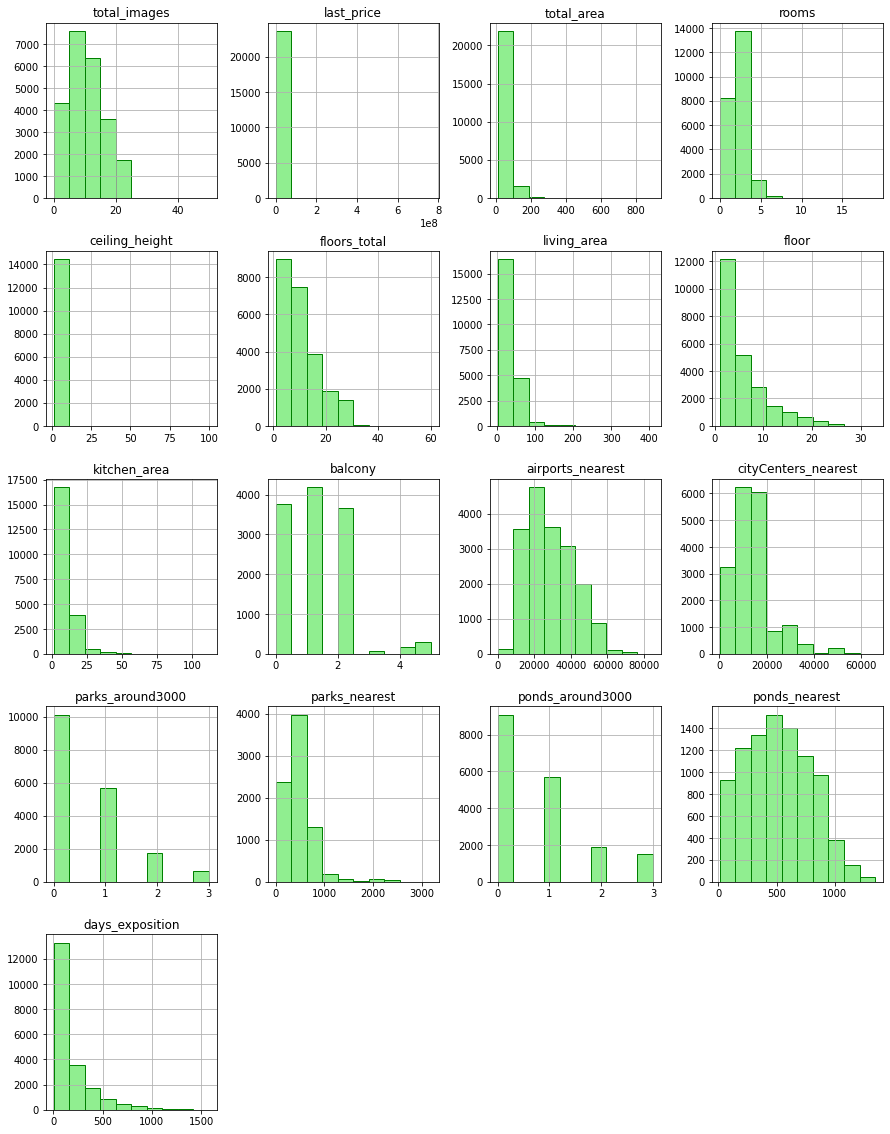

In [5]:
df.hist(figsize=(15, 20), ec='green', color='lightgreen')

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Вот тут еще надо бы оставить промежуточный вывод. В нем обычно пишут то, что обнаружили в ходе знакомства с данными.
</div 

### Предобработка данных

Проверим какое колличество пропусков и явных дубликатов встречается в датасете. 

In [7]:
print('Количество дубликатов' , df.duplicated().sum())

Количество дубликатов 0


In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Явных дубликатов в датасете нет. Пропущенные  значения встречаются в следующих столбцах:

 - ceiling_height - 9195
 - floors_total - 86               
 - living_area - 1903            
 - is_apartment - 20924            
 - kitchen_area - 2278             
 - balcony - 11519                
 - locality_name - 49              
 - airports_nearest - 5542          
 - cityCenters_nearest - 5519     
 - parks_around3000 - 5518        
 - parks_nearest - 15620           
 - ponds_around3000 - 5518        
 - ponds_nearest - 14589          
 - days_exposition - 3181   
 
 Заполним пропущенные значения в данных столбцах.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, пропусков у нас получилось достаточно много и с ними стоит поработать. 
</div 

Столбцы  **cityCenters_nearest, parks_neares, ponds_nearest, airports_nearest**. Пропуски в этих столбцах могут быть связаны с тем, что сервис Яндекс.Недвижимость не может посчитать расстояние до данных объектов т.к они находятся слишком далеко. Пропущенные значения можно заполнить маркерным значением - 77777. 

In [9]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(77777)

#проверим количество пропусков
df['cityCenters_nearest'].isna().sum()

0

In [10]:
df['parks_nearest'] = df['parks_nearest'].fillna(77777)
df['ponds_nearest'] = df['ponds_nearest'].fillna(77777)

#проверим количество пропусков
df['parks_nearest'].isna().sum()
df['ponds_nearest'].isna().sum()

0

In [11]:
df['airports_nearest'] = df['airports_nearest'].fillna(77777)

#проверим количество пропусков
df['airports_nearest'].isna().sum()

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Самое главное, это не забыть отфильтровать значения-заглушки в дальнейшем при расчетах.  
</div 

Столбец **locality_name** - название населенного пункта. Объявления без указания населенного пункта не нужны пользователям, да и в анализе такие строки нам не понадобятся. Поэтому считаю, что такие строки можно удалить.

In [12]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

#проверим количество пропусков
df['locality_name'].isna().sum()

0

Столбец **is_apartment - апартаменты**. В данном столбце пропуски связаны с тем, что тип недвижимости не является апартаментами. В данном случае пропуски можно заполнить нулями.

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(0)

#проверим количество пропусков
df['is_apartment'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут получается достаточно отлично. 
</div 

Столбец **balcony - число балконов**.
Пропуски в этом столбце связаны с отсутсвим балкона в квартире. Заменим пропуски нулями.

In [14]:
df['balcony'] = df['balcony'].fillna(0)

#проверим количество пропусков
df['balcony'].isna().sum()

0

Столдбцы **parks_around3000** и **ponds_around3000** (число парков и водоемов в радиусе 3 км соответсвенно).Пропуски в данных столбцах связаны с тем, что скорее вего в пределах радиуса 3км нет ни парков, ни каких либо водоемов. Поэтому пропущенные значения можно заполнить нулями.

In [15]:
# parks_around3000 
df['parks_around3000'] = df['parks_around3000'].fillna(0)
# ponds_around3000    
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

#проверим количество пропусков
df['parks_around3000'].isna().sum()
df['ponds_around3000'].isna().sum()

0

Столбец **days_exposition** - сколько дней было размещено объявление.  Скорее всего, пропуски связаны с тем, что объявление актуально на момент формирования таблицы. Пропуски учитывать не будем и заполним их меркерным значением - 77777.

In [16]:
df['days_exposition'] = df['days_exposition'].fillna(77777)

#проверим количество пропусков
df['days_exposition'].isna().sum()

0

Пропущенные значения в **floors_total - всего этажей в доме** заменим медианными значениями в зависимости от населенного пункта.

In [17]:
median_floors_total = df.groupby('locality_name')['floors_total'].median()

for fl in df['locality_name'].unique():
    df.loc[(df['locality_name'] == fl), 'floors_total'] = \
    df.loc[(df['locality_name'] == fl), 'floors_total'].fillna(median_floors_total[fl])
    
df['floors_total'] = df['floors_total'].fillna(median_floors_total)

#проверим количество пропусков
df['floors_total'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно неплохой метод у тебя получился по замене. 
</div 

В столбце **ceiling_height - высота потолков** заменим пропуски медианными значения.  

In [18]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

#проверим количество пропусков
df['ceiling_height'].isna().sum()

0

Столбец **living_area - жилая площадь**.

In [19]:
df['koeff_living'] = df['living_area']/df['total_area']

median_koeff_living=df.groupby('rooms').agg({'koeff_living':'median'})

for room in median_koeff_living.index:
    df.loc[(df['rooms']==room)&(df['living_area'].isna()),'living_area']=\
    df.loc[(df['rooms']==room)&(df['living_area'].isna()),'total_area']*median_koeff_living.loc[room, 'koeff_living']

#проверим количество пропусков
df['living_area'].isna().sum()

0

Столбец **kitchen_area - площадь кухни**. Заменим пропущенные значение разнице между общей и жилой площадью.

In [20]:
 df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])

#проверим количество пропусков
df['kitchen_area'].isna().sum()

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А почему решила здесь сделать именно так? А какими методами ты бы еще попробовала обработать тут пропуски?
</div 

Проверим сколько пропусков у нас осталось 

In [21]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
koeff_living            1898
dtype: int64

**ИЗМЕНЕНИЕ ТИПОВ ДАННЫХ**

In [22]:
df['balcony'] = df['balcony'].astype('int32')
df['parks_around3000'] = df['parks_around3000'].astype('int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('int32')
df['days_exposition'] = df['days_exposition'].astype('int32')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Можно было бы тут еще заменить при помощи цикла. 
    
А еще учти, для экономии вычислительной памяти лучше всего заменить на int32 
</div 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2
    
#### Успех
    
Вот а тут прям хорошо вышло. 
</div 

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [24]:
#проверим количество как изменились типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

**НАЗВАНИЕ НАСЕЛЕННЫХ ПУНКТОВ**



Изучим уникальные значения в столбце с названиями и посмотрим есть ли в столбце неявные дубликаты.

In [25]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

По данным выдно, что где-то поселок написано чере "ё", а где-то через "е". Так же где-то указан поселок, а где-то поселок городского типа. Заменим букву ё на е в слове поселок и поселок городского типа на просто поселок.

In [26]:
df['locality_name'] = df['locality_name'].str.replace('ё','е', regex=True)

In [27]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа' , 'поселок', regex=True)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно неплохо у тебя получилось заменить выбивающиеся значения. 
</div 

In [28]:
#Проверим замену
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

**ИССЛЕДОВАНИЕ АНОМАЛИЙ**

Проверим столбцы на редкие и выбивающиеся значения.

Столбец **airports_nearest**

In [29]:
df['airports_nearest'].describe()

count   23,650.00
mean    40,262.88
std     23,499.95
min          0.00
25%     21,173.75
50%     33,564.00
75%     54,253.50
max     84,869.00
Name: airports_nearest, dtype: float64

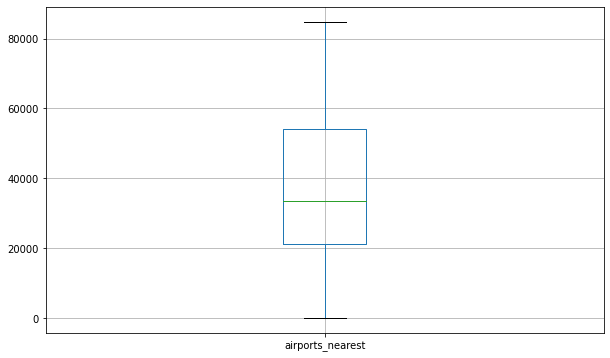

In [30]:
df.boxplot('airports_nearest', figsize = (10,6))
plt.show()

Минимальное расстояние до аэропорта 0, максимальное 84,8 км. Среднее рассояние около 40 км.Редких и выбивающихся значения нет.

Столбец **ceiling_height**

In [31]:
df['ceiling_height'].describe()

count   23,650.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

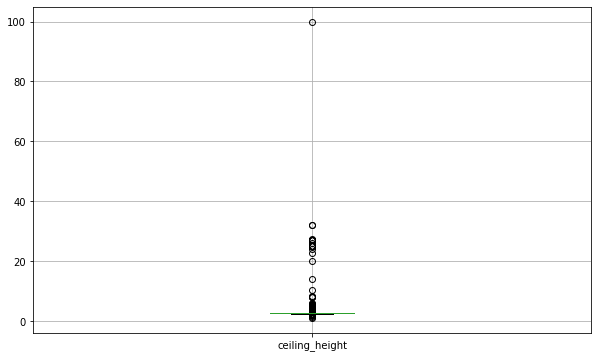

In [32]:
df.boxplot('ceiling_height', figsize = (10,6))
plt.show()

Минимальная высота потолком 1м, а максимальная 100м, что очень странно. Среднее значение 2,72, что  соответсвует действительности. Дальше в исследовании будем смотреть квартиры с потолками не менее 2м и не более 5 метров. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, тут видно достаточное количество выбивающихся значений и необходимо с ними что-то делать. 
</div 

Столбец **living_area**

In [33]:
df['living_area'].describe()

count   23,650.00
mean        34.68
std         22.84
min          2.00
25%         18.70
50%         30.00
75%         42.32
max        430.13
Name: living_area, dtype: float64

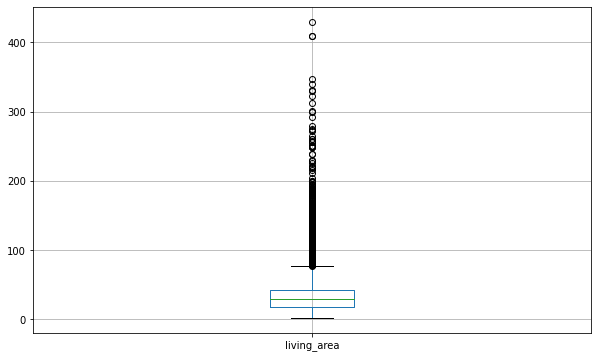

In [34]:
df.boxplot('living_area', figsize = (10,6))
plt.show()

Максимальное значение 409.70. Для жилой площади редкое значение. В дальнейшем исследование огрничем данные по жилой площади до 200м2. Значение больше это скрорее всего редкие и эксклюзивные значения.

Столбец **cityCenters_nearest**

In [35]:
df['cityCenters_nearest'].describe()

count   23,650.00
mean    29,013.28
std     27,915.95
min        181.00
25%     10,939.00
50%     14,996.00
75%     35,177.00
max     77,777.00
Name: cityCenters_nearest, dtype: float64

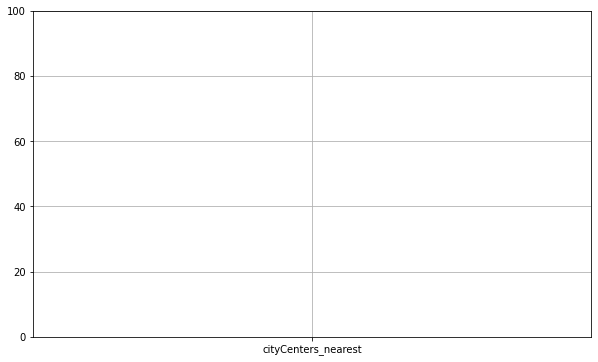

In [36]:
df.boxplot('cityCenters_nearest', figsize = (10,6))
plt.ylim(0,100)
plt.show()

Одно аномальное значение. Можно его оставить.

Столбец **days_exposition**

In [37]:
df['days_exposition'].describe()

count   23,650.00
mean    10,614.41
std     26,473.06
min          1.00
25%         45.00
50%        124.00
75%        390.00
max     77,777.00
Name: days_exposition, dtype: float64

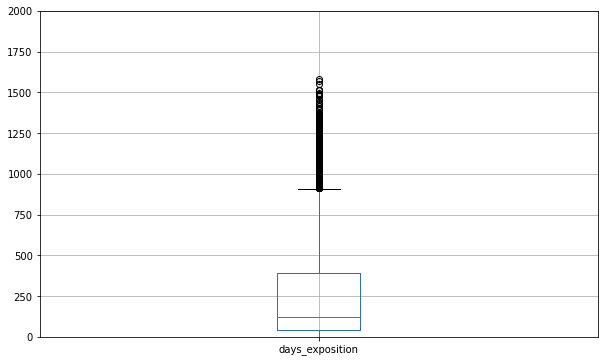

In [38]:
df.boxplot('days_exposition', figsize = (10,6))
plt.ylim(0,2000)
plt.show()

Есть выбивающиеся значения. Оставим их.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Помни, что ты всегда можешь убрать выбивающиеся значения. Самое главное, не увлекатсья и не убрать более 10% от первоначальных данных.
</div 

Столбецы  **floor** и **floors_total**

In [39]:
df['floor'].describe()

count   23,650.00
mean         5.89
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

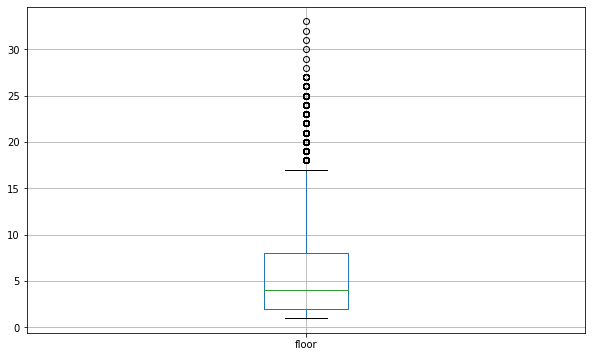

In [40]:
df.boxplot('floor', figsize = (10,6))
plt.show()

In [41]:
df['floors_total'].describe()

count   23,650.00
mean        10.67
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

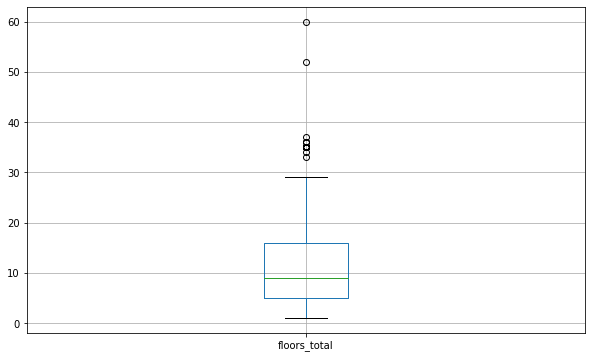

In [42]:
df.boxplot('floors_total', figsize = (10,6))
plt.show()

Максимальный этаж, на котором продается квартира - 33. А максимальная этажность жилого дома 60. Жилые дома с этажностью более 25 редкость. Долее в мсследование не будем учитавать дома с этажность более 25 этажей.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Разумно, соглашусь. 
</div 

Столбец **kitchen_area**

In [43]:
df['kitchen_area'].describe()

count   23,650.00
mean        11.74
std          8.23
min          0.00
25%          7.20
50%          9.80
75%         13.00
max        255.70
Name: kitchen_area, dtype: float64

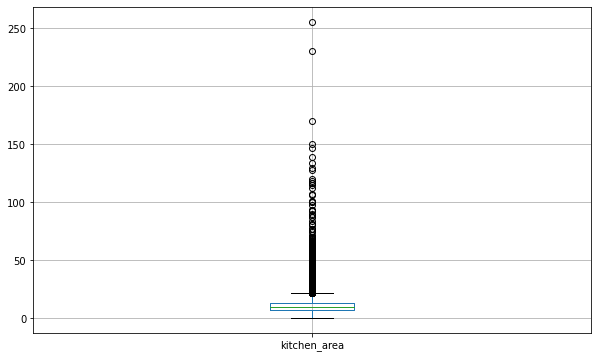

In [44]:
df.boxplot('kitchen_area', figsize = (10,6))
plt.show()

Средняя площадь кухни примерно 10,5 м2, что соответствует действительности. Максимальное значение 112. Площадь кухни более 20м выглядит странно. Возможно это студии или квартиры евроформата, где кухня и гостинная вместе. Для дальнейшего исследование ограничимся площадью кухне не более 50м2.

Столбец **last_price**

In [45]:
df['last_price'].describe()

count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Минимальное значение 12,190, что очень мало. Посмотрим на это объявление. 

In [46]:
df[df['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_living
8778,7,"12,190.00",109.00,2019-03-20,2,2.75,25.00,32.00,25,0,False,False,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1,805.00,0,"77,777.00",8,0.29


Предположу, что пользователь указал стоимость в тысячах, а не в миллионах. Исправим данное значение. 

In [47]:
df.loc[df['last_price'] < 100000, 'last_price'] = df.loc[df['last_price'] < 100000, 'last_price'] * 10 ** 3

In [48]:
df['last_price'].describe()

count        23,650.00
mean      6,541,641.82
std      10,896,378.37
min         430,000.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

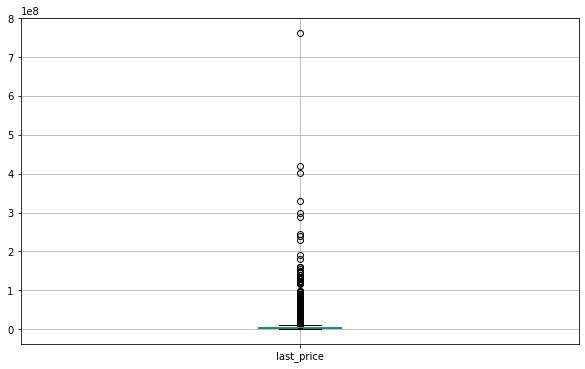

In [49]:
df.boxplot('last_price', figsize = (10,6))
plt.show()

Много выбивающихся значений. Огрначим наши данные 50 млн., т.к. стоимость больше очень редкое явление.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, и по этому согласен тоже. Отлично получилось. 
</div 

Столбец **rooms**

In [50]:
df['rooms'].describe()

count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

<AxesSubplot:>

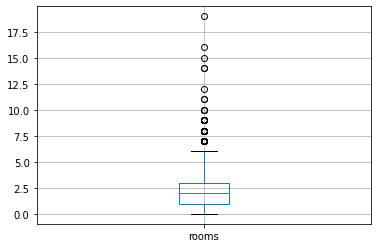

In [51]:
df.boxplot('rooms')

Минимальное значение 0. Скорее всего это студии. Максимальное значение 19, что достаточно много. Возможно это коммунальная квартира. Квартиры, где больше 5 комнат, встречаются редкость. Поэтому квартиры с количесвом комнат более 5 не будем учитывать.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Это уже редкость и в реальности встречается уже очень редко. Думаю, что на них не стоит делать акцент. 
</div 

Столбец **total_area**

In [52]:
df['total_area'].describe()

count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

<AxesSubplot:>

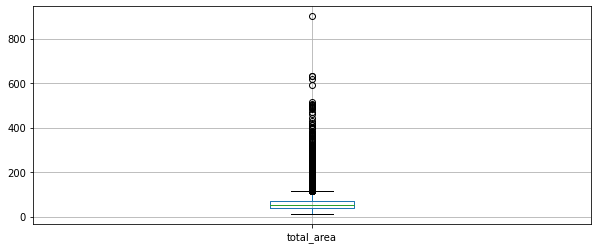

In [53]:
df.boxplot('total_area', figsize = (10,4))

Минимальное значение 12м2. На первый взгляд слишком маленькое значение для квартиры. Но предположу, что скорее всего это комната в комунальной квартире. Так же у нас встречаются достаточно большие площади кварир. Посмотрим сколько квартир по площади больше 200м2. Квартиры площадью более 200м2 скорее редкость и исключение. Оставим эти строки, но ограничим наш датафрейм до 200м2.

Столбец **total_images**

In [54]:
df['total_images'].describe()

count   23,650.00
mean         9.86
std          5.68
min          0.00
25%          6.00
50%          9.00
75%         14.00
max         50.00
Name: total_images, dtype: float64

<AxesSubplot:>

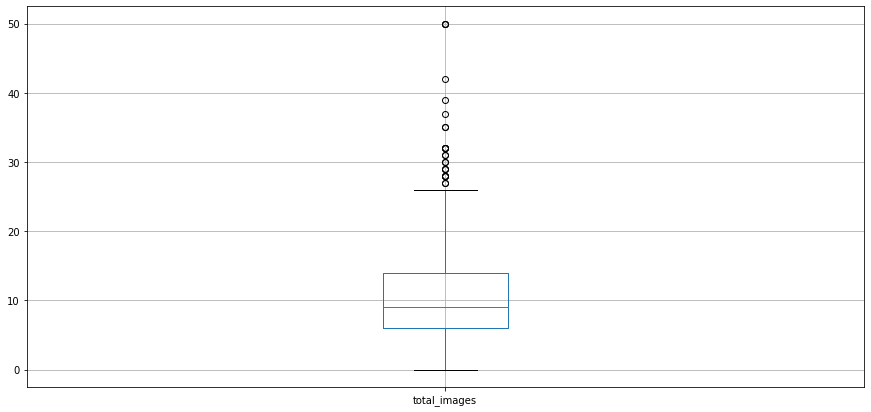

In [55]:
df.boxplot('total_images', figsize = (15,7))

У нас встрачаются строки где нет фотографий и достаточно много фотографий (более 25 штук). Отсутсвие фотографий может быть связано, что у пользователя их нет или он не успел их загрузить. А большое количество фотографий, может быть свзяано с тем, что пользаветель решил дать более подробную информацию о квартире. Оставим эти строки и не будем их удалять. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно хорошо у тебя получилось с предобработкой данных. Переходим дальше.
</div 

### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [56]:
df['m2_price'] = df['last_price'] / df['total_area']

**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [57]:
df['weekday_of_exposition'] = df['first_day_exposition'].dt.weekday

In [58]:
def weekday_of_exposition(row):
    weekday = row
    if weekday == 0:
        return 'понедельник'
    if weekday == 1:
        return 'вторник'
    if weekday == 2:
        return 'среда'
    if weekday == 3:
        return 'четверг'
    if weekday == 4:
        return 'пятница'
    if weekday == 5:
        return 'суббота'
    if weekday == 6:
        return 'воскресенье'
    return 'неизвестно'

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Имей в виду, метод этот хоть и достаточно хороший, но так результат немного сложнее фильтровать на графиках.
</div 

In [59]:
df['weekday_of_exposition'] = df['weekday_of_exposition'].apply(weekday_of_exposition)

**Добавим месяц и год публикации объявления**

In [60]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

#месяц публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month

#год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year


**Тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [61]:
def group_for_floor(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
    
        if floor == floors_total:
            return 'последний'
    
        return 'другой'
    except: 
        return 'неизвестно'

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простая, удобная и понятная функция. Здорово получилось.
</div 

In [62]:
df['floor'] = df.apply(group_for_floor, axis=1)

**Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [63]:
df['cityCenters_nearest'] = (df['cityCenters_nearest'] / 1000).round(0)

In [64]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_living,m2_price,weekday_of_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,другой,0,False,False,25.00,0,Санкт-Петербург,"18,863.00",16.00,1,482.00,2,755.00,77777,0.47,"120,370.37",четверг,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,первый,0,False,False,11.00,2,поселок Шушары,"12,817.00",19.00,0,"77,777.00",0,"77,777.00",81,0.46,"82,920.79",вторник,12,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,другой,0,False,False,8.30,0,Санкт-Петербург,"21,741.00",14.00,1,90.00,2,574.00,558,0.61,"92,785.71",четверг,8,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,100.43,другой,0,False,False,58.57,0,Санкт-Петербург,"28,098.00",7.00,2,84.00,3,234.00,424,NaN,"408,176.10",пятница,7,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,другой,0,False,False,41.00,0,Санкт-Петербург,"31,856.00",8.00,2,112.00,1,48.00,121,0.32,"100,000.00",вторник,6,2018


### Проведите исследовательский анализ данных

1. Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Общая площадь в квадратных метрах (м²)**

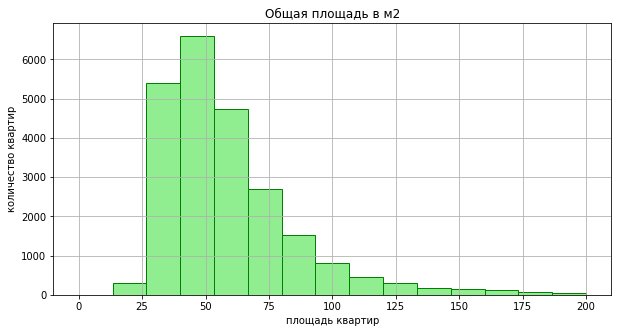

In [65]:
df['total_area'].hist(bins=15,  figsize=(10,5), range=(0,200), ec='green', color='lightgreen')
plt.title('Общая площадь в м2')
plt.ylabel('количество квартир')
plt.xlabel('площадь квартир')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ну а тут просто отличная визуализация у тебя получилась. По графику мы можем сделать вывод, что самая распространенная площадь, от 30 до 60 метров. 
</div 

Большенство квартир находится примерно в диапозоне от 3 до 60м2.  

**Жилая площадь в квадратных метрах (м²)**

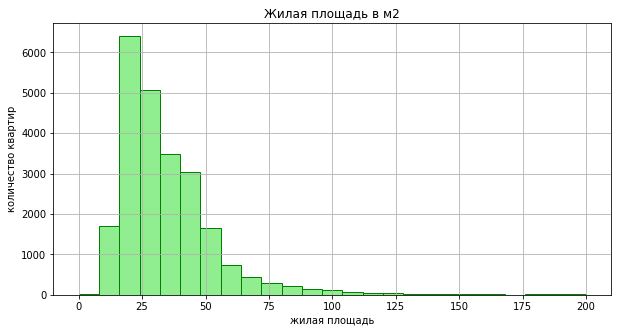

In [66]:
df['living_area'].hist(bins=25, figsize=(10,5), range=(0,200), ec='green', color='lightgreen')
plt.title('Жилая площадь в м2')
plt.ylabel('количество квартир')
plt.xlabel('жилая площадь')
plt.show()

Жилая площадь большенства квартир находится примерно в диапозоне от 16 до 32м2.  

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь все по делу вышло. 
</div 

**Площадь кухни в квадратных метрах (м²)**

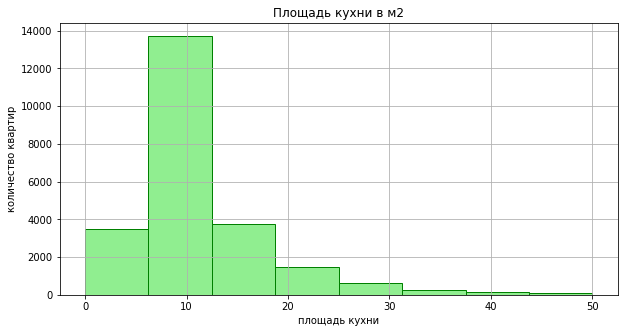

In [67]:
df['kitchen_area'].hist(bins=8, figsize=(10,5), range=(0,50), ec='green', color='lightgreen')
plt.title('Площадь кухни в м2')
plt.ylabel('количество квартир')
plt.xlabel('площадь кухни')
plt.show()

Жилая кухни большенства квартир находится примерно в диапозоне от 19 до 13м2.

**Цена на момент снятия с публикации**

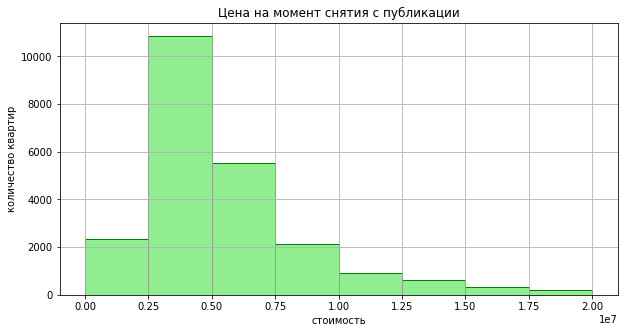

In [68]:
df['last_price'].hist(bins=8, figsize=(10,5), range=(0,20000000), ec='green', color='lightgreen')
plt.title('Цена на момент снятия с публикации')
plt.ylabel('количество квартир')
plt.xlabel('стоимость')
plt.show()

Стоимость большинства квартир находится в диапозоне от 2,5 до 5 млн.

**Количество комнат**

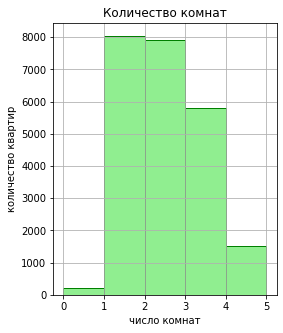

In [69]:
df['rooms'].hist(bins=5, figsize=(4,5), range=(0,5), ec='green', color='lightgreen')
plt.title('Количество комнат')
plt.ylabel('количество квартир')
plt.xlabel('число комнат')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Как и было понятно по площади, большая часть квартир имеет комнатность от 1 до 2 
</div 

Большинство квартир 1 или 2 комнатные.

**Высота потолков**

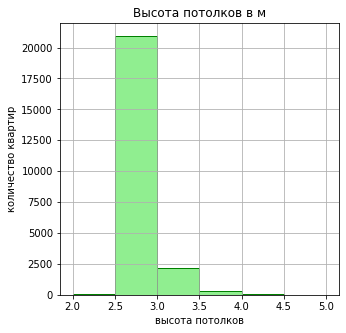

In [70]:
df['ceiling_height'].hist(bins=6, figsize=(5,5), range=(2,5), ec='green', color='lightgreen')
plt.title('Высота потолков в м')
plt.ylabel('количество квартир')
plt.xlabel('высота потолков')
plt.show()

Высота потолков в большенстве квартир находится в диапозоне от 2,5 до 3 метров.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Потолки более 3 метров имеет дореволюционная застройка. 
</div 

**Этаж квартиры**

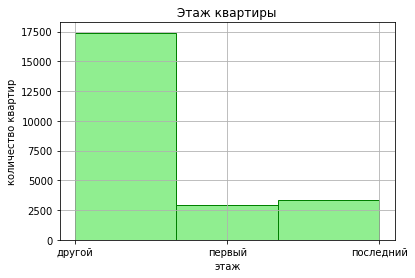

In [71]:
df['floor'].hist(bins=3, figsize=(6,4), ec='green', color='lightgreen')
plt.title('Этаж квартиры')
plt.ylabel('количество квартир')
plt.xlabel('этаж')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ну и здесь логично. Квартиры на первом этаже пользуются наименьшим спросом.  
</div 

Меньше всего квартир на первых и последних этажах.

**Общее количество этажей в доме**

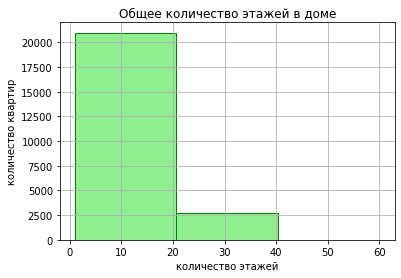

In [72]:
df['floors_total'].hist(bins=3, figsize=(6,4), ec='green', color='lightgreen')
plt.title('Общее количество этажей в доме')
plt.ylabel('количество квартир')
plt.xlabel('количество этажей')
plt.show()

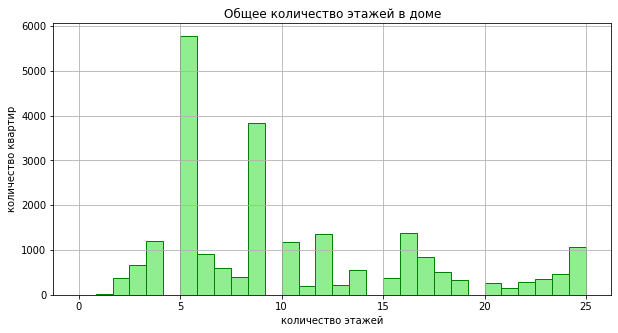

In [73]:
df['floors_total'].hist(bins=30, figsize=(10,5), range = (0,25), ec='green', color='lightgreen')
plt.title('Общее количество этажей в доме')
plt.ylabel('количество квартир')
plt.xlabel('количество этажей')
plt.show()

Больше всего квартир продается в домах с этажность от 5 до 10.

**Расстояние до центра города в км**

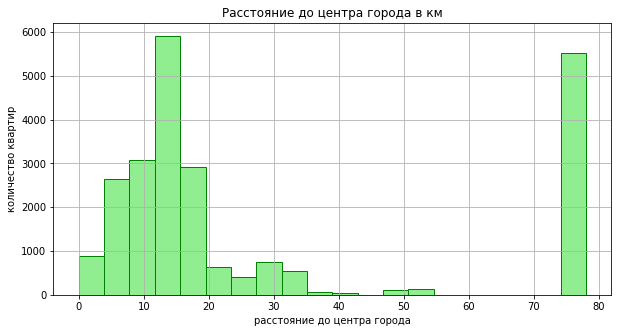

In [74]:
df.query('cityCenters_nearest != 77777')['cityCenters_nearest'].hist(bins=20, figsize=(10,5), ec='green', color='lightgreen')
plt.title('Расстояние до центра города в км')
plt.ylabel('количество квартир')
plt.xlabel('расстояние до центра города')
plt.show()

Большинство квартир находится в радиусе 20км от центра города.

**Расстояние до ближайшего аэропорта**

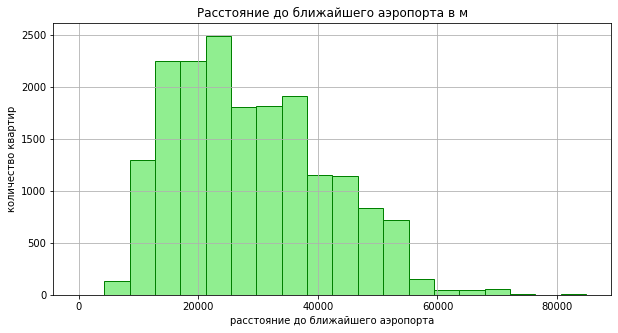

In [75]:
df.query('airports_nearest != 77777')['airports_nearest'].hist(bins=20, figsize=(10,5), ec='green', color='lightgreen')
plt.title('Расстояние до ближайшего аэропорта в м')
plt.ylabel('количество квартир')
plt.xlabel('расстояние до ближайшего аэропорта')
plt.show()

Большинство квартир находится в радиусе от 15 до 40км от аэропорта.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так. Квартиры такие приближены к СПБ.
</div 

**Расстояние до ближайшего парка**

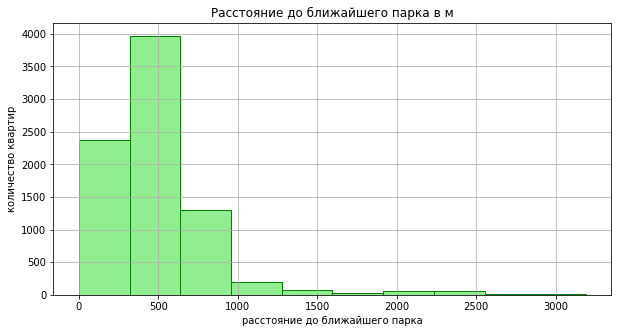

In [76]:
df.query('parks_nearest != 77777')['parks_nearest'].hist(bins=10, figsize=(10,5), ec='green', color='lightgreen')
plt.title('Расстояние до ближайшего парка в м')
plt.ylabel('количество квартир')
plt.xlabel('расстояние до ближайшего парка')
plt.show()

Большенство парков находся в пределах 1км от продоваемых квартир.

**День и месяц публикации объявления**

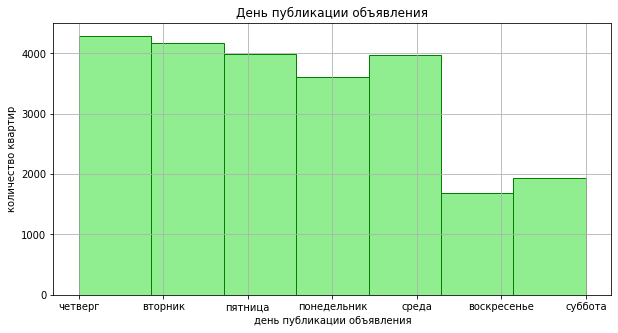

In [77]:
df['weekday_of_exposition'].hist(bins=7, figsize=(10,5), ec='green', color='lightgreen')
plt.title('День публикации объявления')
plt.ylabel('количество квартир')
plt.xlabel('день публикации объявления')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Людям на выходных не до продаж квартир. 
</div 

Большинсво объявлений было опубликовано в будни.

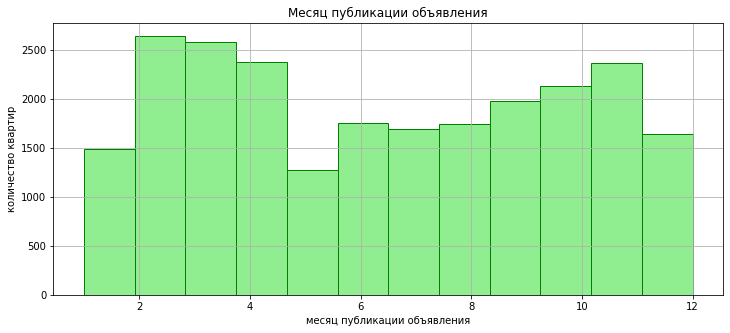

In [78]:
df['month_exposition'].hist(bins=12, figsize=(12,5), ec='green', color='lightgreen')
plt.title('Месяц публикации объявления')
plt.ylabel('количество квартир')
plt.xlabel('месяц публикации объявления')
plt.show()

Большинство объявлений было опубликовано с февраля по апрель. Затем идет резкий спад и далее до декабря идет увеличение публикации объявлений.

**2. Изучите, как быстро продавались квартиры (столбец days_exposition).**

In [79]:
df.query('days_exposition != 77777')['days_exposition'].describe()

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

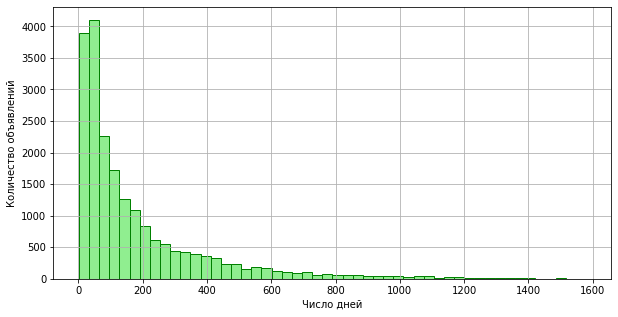

In [80]:
df.query('days_exposition != 77777')['days_exposition'].hist(bins=50, figsize=(10,5), ec='green', color='lightgreen')
plt.xlabel('Число дней')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир продаются примерно в течении 2х месяцев. 

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Если посмотреть на данные более детально, то можно увидеть выбросы в районе 45, 60 и 95 дней. В это время система убирает с показа бесплатные объявления. 
</div 

**3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**Зависимость цены от общей площади**

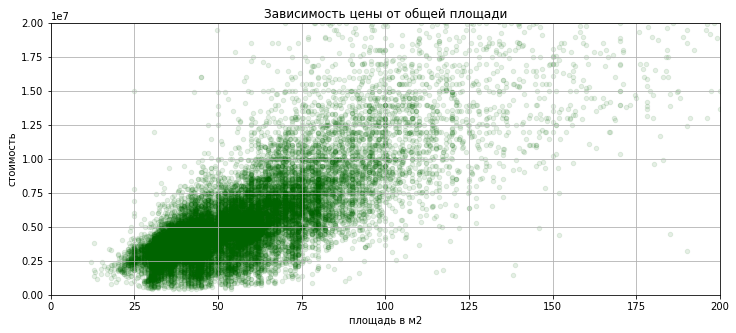

In [81]:
(df
 .plot(x='total_area', y='last_price', kind='scatter', figsize=(12, 5), grid=True, color='darkgreen', alpha = 0.1)
).set_title('Зависимость цены от общей площади')
plt.ylabel('cтоимость')
plt.ylim(0,20000000)
plt.xlim(0,200)
plt.xlabel('площадь в м2')
plt.show()

По графику видно, что чем больше площадь, тоем выше стоимость. Есть также единичные значения, когда квартиры с маленькой площадью стоят дороже и наоборот (с большой площадью дешевле). На это может влият несколько факторов. Например, качество ремонта, локация, срочность продажи.

**Зависимость цены от жилой площади**

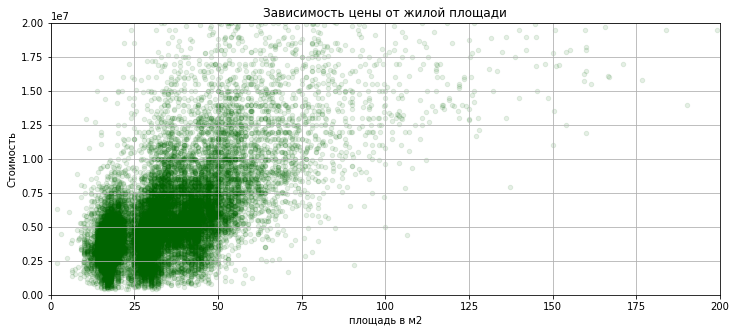

In [82]:
(df
 .plot(x='living_area', y='last_price', kind='scatter', figsize=(12, 5), grid=True, color='darkgreen', alpha = 0.1)
).set_title('Зависимость цены от жилой площади')
plt.ylim(0,20000000)
plt.xlim(0,200)
plt.ylabel('Стоимость')
plt.xlabel('площадь в м2')
plt.show()

На этом графике также прослеживается зависимость, что чем больше жилая площадь, тем веше стоимость квартиры.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Здесь надо было убрать с графика значения-заглушки.  
</div 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2
    
#### Успех
    
Сейчас супер. Лишниее ты убрала. 
</div 

**Зависимость цены от площади кухни**

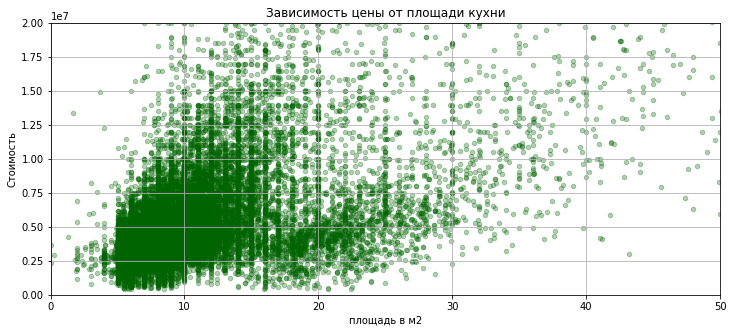

In [83]:
(df
 .plot(x='kitchen_area', y='last_price',  kind='scatter',figsize=(12, 5), grid=True, color='darkgreen', alpha = 0.3)
).set_title('Зависимость цены от площади кухни')
plt.ylim(0,20000000)
plt.xlim(0,50)
plt.ylabel('Стоимость')
plt.xlabel('площадь в м2')
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Аналогично.  
</div 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2
    
#### Успех
    
И тут  тоже 
</div 

Также прослеживается зависимость, что чем больше площадь кухни, тем веше стоимость квартиры.

**Зависимость цены от количества комнат**

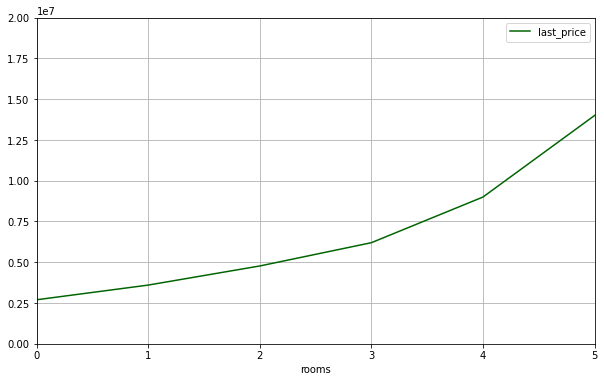

In [84]:
(df
 .pivot_table(index='rooms', values='last_price', aggfunc='median')
 .plot(style='-', xlim=(0, 5), ylim=(0, 20000000), grid=True, color='darkgreen',  figsize=(10, 6))
)
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Так тоже не пойдет. Надо позать результат так, чтобы полностью видно было сами боксплоты.  
</div 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2
    
#### Успех
    
Супер 
</div 

По графику видно, что чем больше комнат, тем выше стоимость квартиры. Это может быть связано с тем, что чем больше комнат, тем больше пложадь квартиры. 

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)**

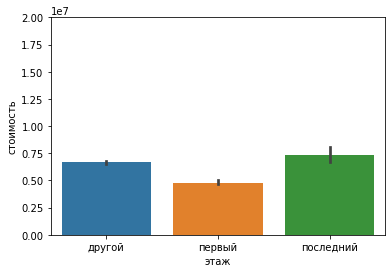

In [85]:
sns.barplot(
    x='floor', 
    y='last_price', 
    data=df)
plt.ylim(0,20000000)
plt.ylabel('стоимость')
plt.xlabel('этаж')
plt.show()

По диаграмме видно, что квартиры на первом этаже стоят дешевле, чем на остальных этажах.

**Зависимость цены от даты размещения (день недели, месяц, год).**

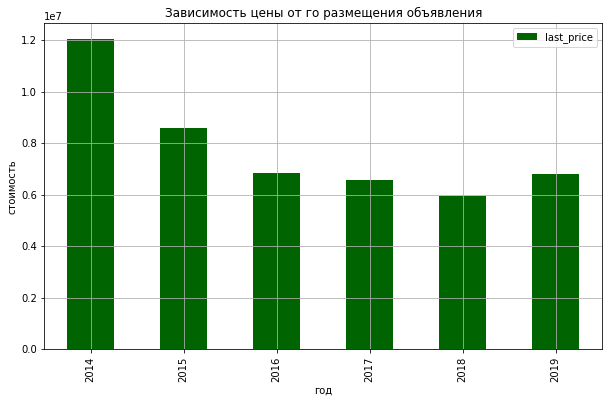

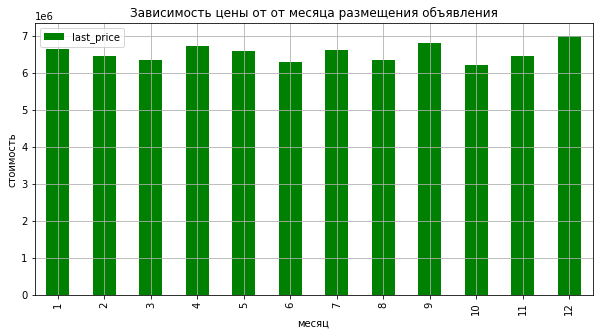

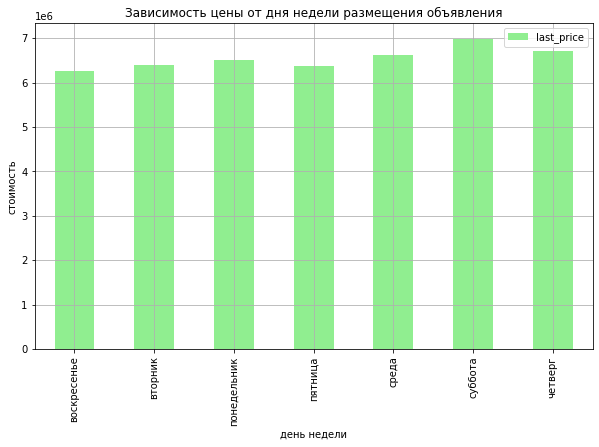

In [86]:
#Год
(df
 .pivot_table(index='year_exposition', values='last_price', aggfunc='mean')
 .plot(kind='bar', grid=True, figsize=(10, 6), color='darkgreen')
)
plt.title('Зависимость цены от го размещения объявления')
plt.ylabel('стоимость')
plt.xlabel('год')
plt.show()

#Месяц
(df
 .pivot_table(index='month_exposition', values='last_price', aggfunc='mean')
 .plot(kind='bar', grid=True, figsize=(10, 5), color='green')
)
plt.title('Зависимость цены от от месяца размещения объявления')
plt.ylabel('стоимость')
plt.xlabel('месяц')
plt.show()

#День недели
(df
 .pivot_table(index='weekday_of_exposition', values='last_price',)
 .plot(kind='bar', grid=True, figsize=(10, 6), color='lightgreen')
)
plt.title('Зависимость цены от дня недели размещения объявления')
plt.ylabel('стоимость')
plt.xlabel('день недели')
plt.show()


День недели и месяц никак не влияют на стоимость квартир. Если смотреть по годам, то видно, что с 2015 до 2018  наблюдается резкий спад в стоимости квартир, а далее уже небольшой рост. Это связано с экономическими проблемами в стране в этот период. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот тут получилось идеально.  
</div 

**4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

Выделим 10 город с наибольшим голисвом объявлений. 

In [87]:
top_10 = df['locality_name'].value_counts().sort_values(ascending=False).head(10)
print(top_10)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


На первом месте Санк_Петербур - 15721 объявление.
Посчитаем средюю стоимость квадратного метра для каждого города.

In [88]:
top_10 = (pd.pivot_table(df, index='locality_name', values='m2_price', aggfunc={'count', 'mean'}).sort_values('count', ascending=False).head(10))
top_10.sort_values('mean')

,count,mean
locality_name,,
Выборг,237,"58,141.91"
Всеволожск,398,"68,654.47"
Гатчина,307,"68,746.15"
Колпино,338,"75,424.58"
поселок Шушары,440,"78,677.36"
поселок Мурино,556,"85,681.76"
поселок Парголово,327,"90,175.91"
деревня Кудрово,299,"92,473.55"
Пушкин,369,"103,125.82"


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Со списокм топ-10 разобрались. Супер 
</div 

В Санкт-Петербург самая высокая стоимость квадратного метра - 114,856. Что в принципе и логично. Далее у нас и населенные пункты, которые находятся очень близко к Санкт-Петербургу. 

**5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [89]:
# Выделим квартиры в Питере:
df_spb = df.query('locality_name == "Санкт-Петербург" ')

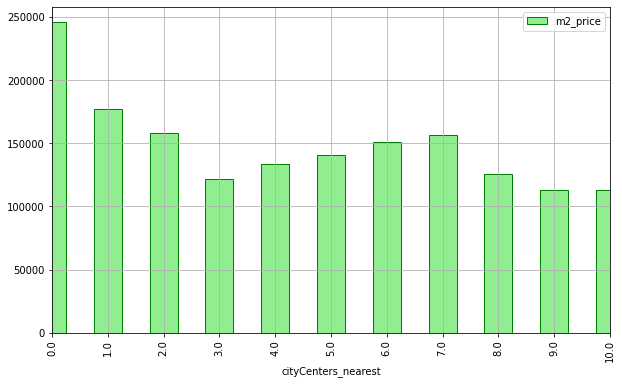

In [90]:
# Построим гистограмму, чтобы определить границу центра
((df_spb
  .pivot_table(index='cityCenters_nearest',values='m2_price',aggfunc='mean', )
  .plot(kind='bar', grid=True, figsize=(10, 6), ec='green', color='lightgreen')))
plt.xlim(0,10)
plt.show()

Как и следовало ожидать в самом центре Санкт-Петербура, самые высокая стоимость квадратного метра. (радиус до 3км). Затем идетспад и небольшой подъем до радиума 7 км и дальше стоимость погижается. С чем может быть связан такой спад? Ведь 3км от цетра это очень близко. Предположу, что картину могут портить комнаты в комунальных квартирах, которые могут продавать как сдудии или как самостоятельные комнаты. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И с определением центра у тебя не возникло проблем. 
</div 

### Общий вывод

Из проведенного исследования можно сделать следующие выводы:

- 1.Стоимость квартиры зависит от местоположения, общей площади, жилой площади и площади кухни и этажа. Количество комнат также влияет на стоимость. Чем больше комнат, тем дороже. Но это может быть связано с тем, что чем больше комнат, тем больше площадь. По сути это будет больше зависимость от общей площади. 
- 2. В Санкт-Петербурге стоимость м2 выше, чем в остальных городах из. Если брать Санкт-Петербур, то самые дорогие объекты находятся в центре в пределах 3км.
- 3. Чем больше общая площадь и площадь кухни и жилой, тем дороже квартиры. 
- 4. На первом этаже квартиры стоят дешевле, чем на остальных.
- 5. Месяц и день недели никак не влияют на стоимость квартир, что не скажешь о годе. Как видно из анализа после 2014г наблюдался рез спад в стоимости жилья.
- 6. Большинство квартир продается в течении 2х месяцев.
- 7. Больше всего продают 1-2ком. квартиры.
- 8. Больше всего квартир в продаже площадью 30-60м2 и с высотой потолков 2,5 до 3м. Квартиры с потолками более 3м относятся к старому фонду. 
- 9. В будни объявлений публикуется больше, чем выходные. 

В процессе анализа встретилось большое количество пропущенных значений.  Чтобы минимизировать пропуски, можно настроить автоматическое заполнение некоторых значений. Например, если тип жилья  не соответствует “студия” , то система автоматически ставит значение “False” или ноль. Или, например с количеством парков и прудов в радиусе 3км. Если их нет, система автоматически ставит значение ноль. Также, например, такие значения как жилая площадь,  площадь кухни, высота потолков можно сделать обязательными для заполнения.
Также предположу, что часть данных были утеряны в процессе выгрузки. 



<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
В выводе не хватает рекомендаций. У тебя было достаточное количество пропусков. Как думаешь, что стоит сделать, чтобы их минимизировать? 
</div 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера ver.2
    
#### Успех
    
А сейчас у тебя получился хороший и дополненный вывод. Молодец. 
</div 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобралась с предобработкой данных. Твои выводы вполне логичны и все на своих местах. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Требуется убрать значения-заглушки в подсчете зависимости. 
* Исправить график Боксплот.
* Дополнить итоговый вывод.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод